In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv(r"C:\Users\rosha\Desktop\assignments\KNN\Zoo.csv")
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
data.mode()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,frog,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,1


In [7]:
data[data["animal name"] =="frog"]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [8]:
data[data.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [9]:
number=data.select_dtypes(include="number")

In [10]:
number.skew()

hair        0.304908
feathers    1.538501
eggs       -0.346676
milk        0.388876
airborne    1.251556
aquatic     0.608577
predator   -0.222443
toothed    -0.431569
backbone   -1.707118
breathes   -1.461244
venomous    3.163428
fins        1.799849
legs        0.139427
tail       -1.126430
domestic    2.250991
catsize     0.263515
type        0.852362
dtype: float64

In [11]:
number.skew()[(number.skew()>=1) | (number.skew()<0 )]

feathers    1.538501
eggs       -0.346676
airborne    1.251556
predator   -0.222443
toothed    -0.431569
backbone   -1.707118
breathes   -1.461244
venomous    3.163428
fins        1.799849
tail       -1.126430
domestic    2.250991
dtype: float64

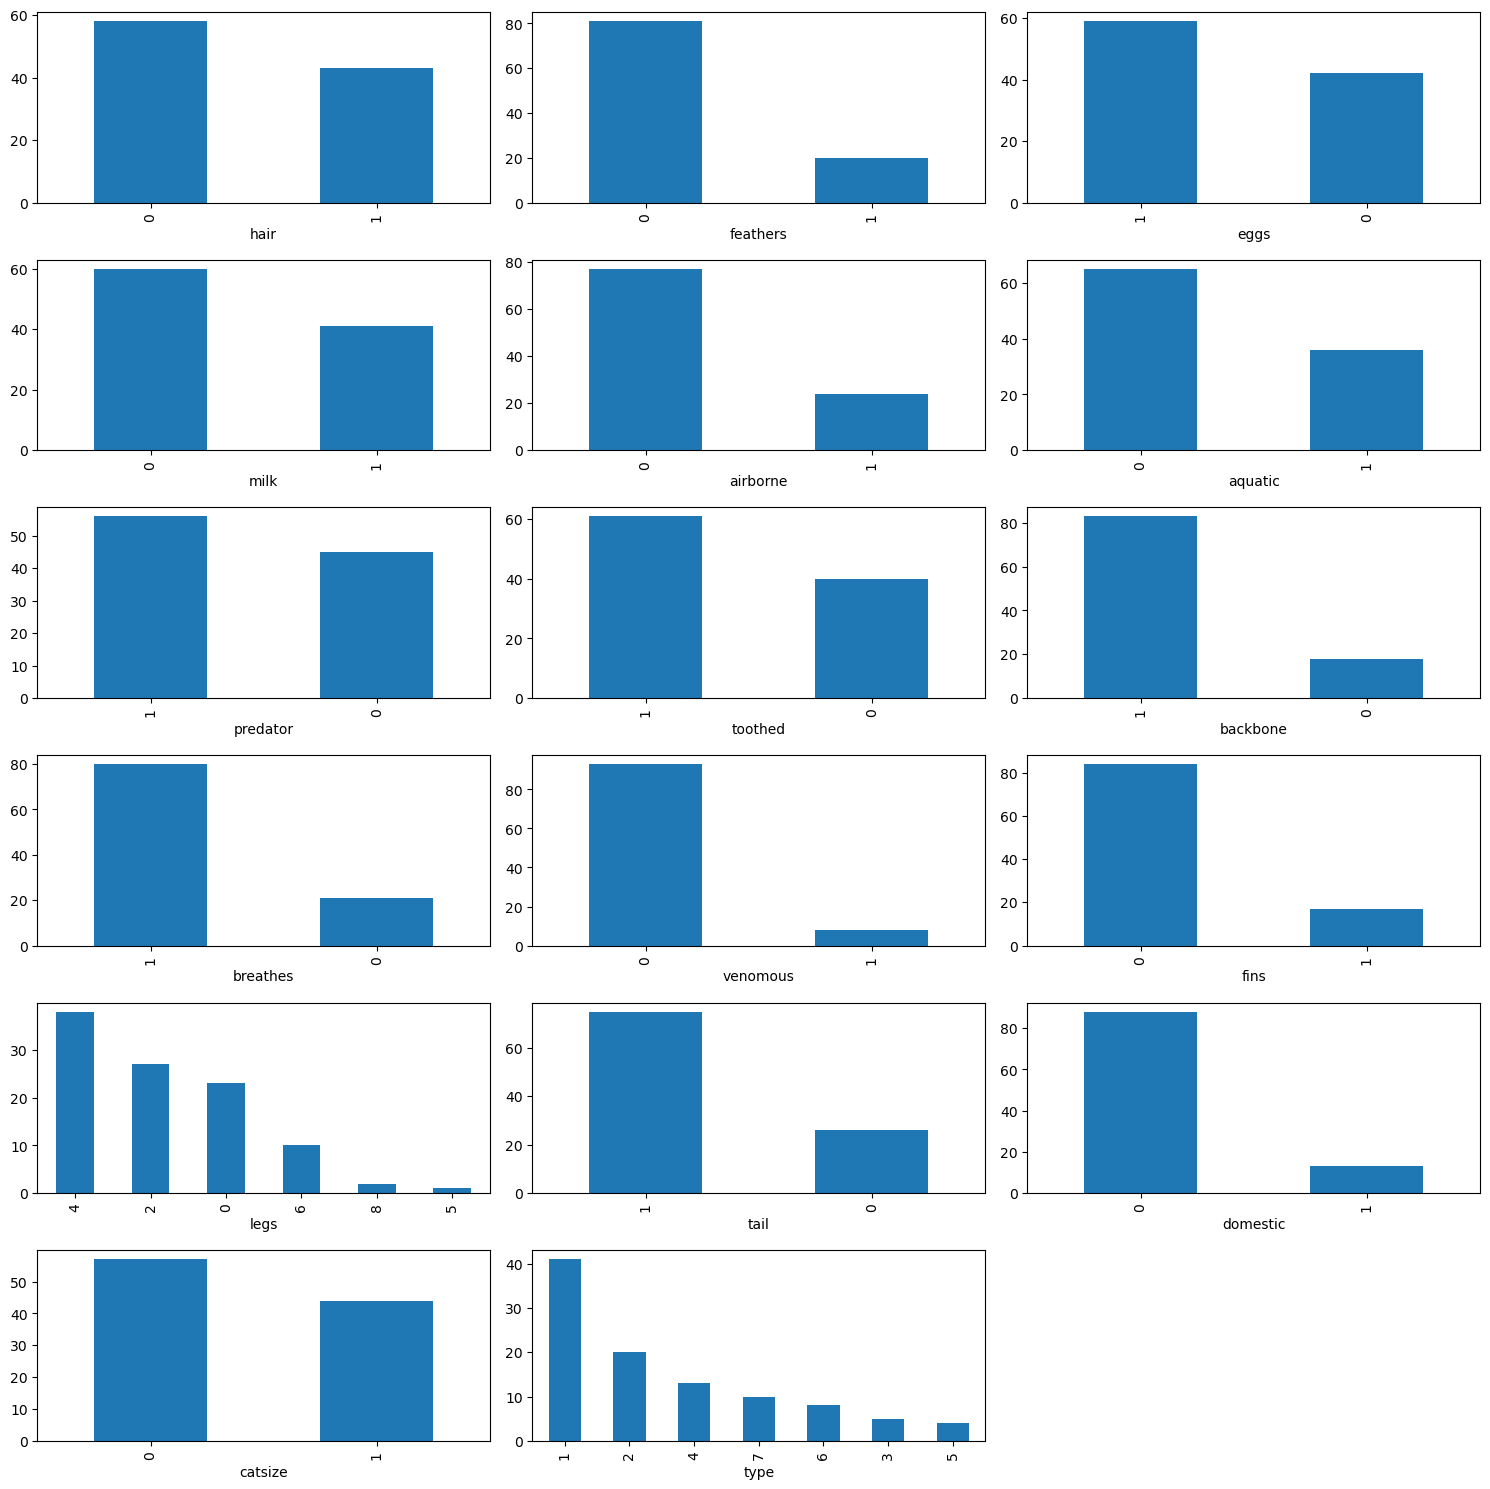

In [12]:
i=1
plt.figure(figsize=(15,15))
for col in number :
    plt.subplot(6,3,i)
    number[col].value_counts().plot(kind="bar")
    i+=1
    
plt.tight_layout()
plt.show()

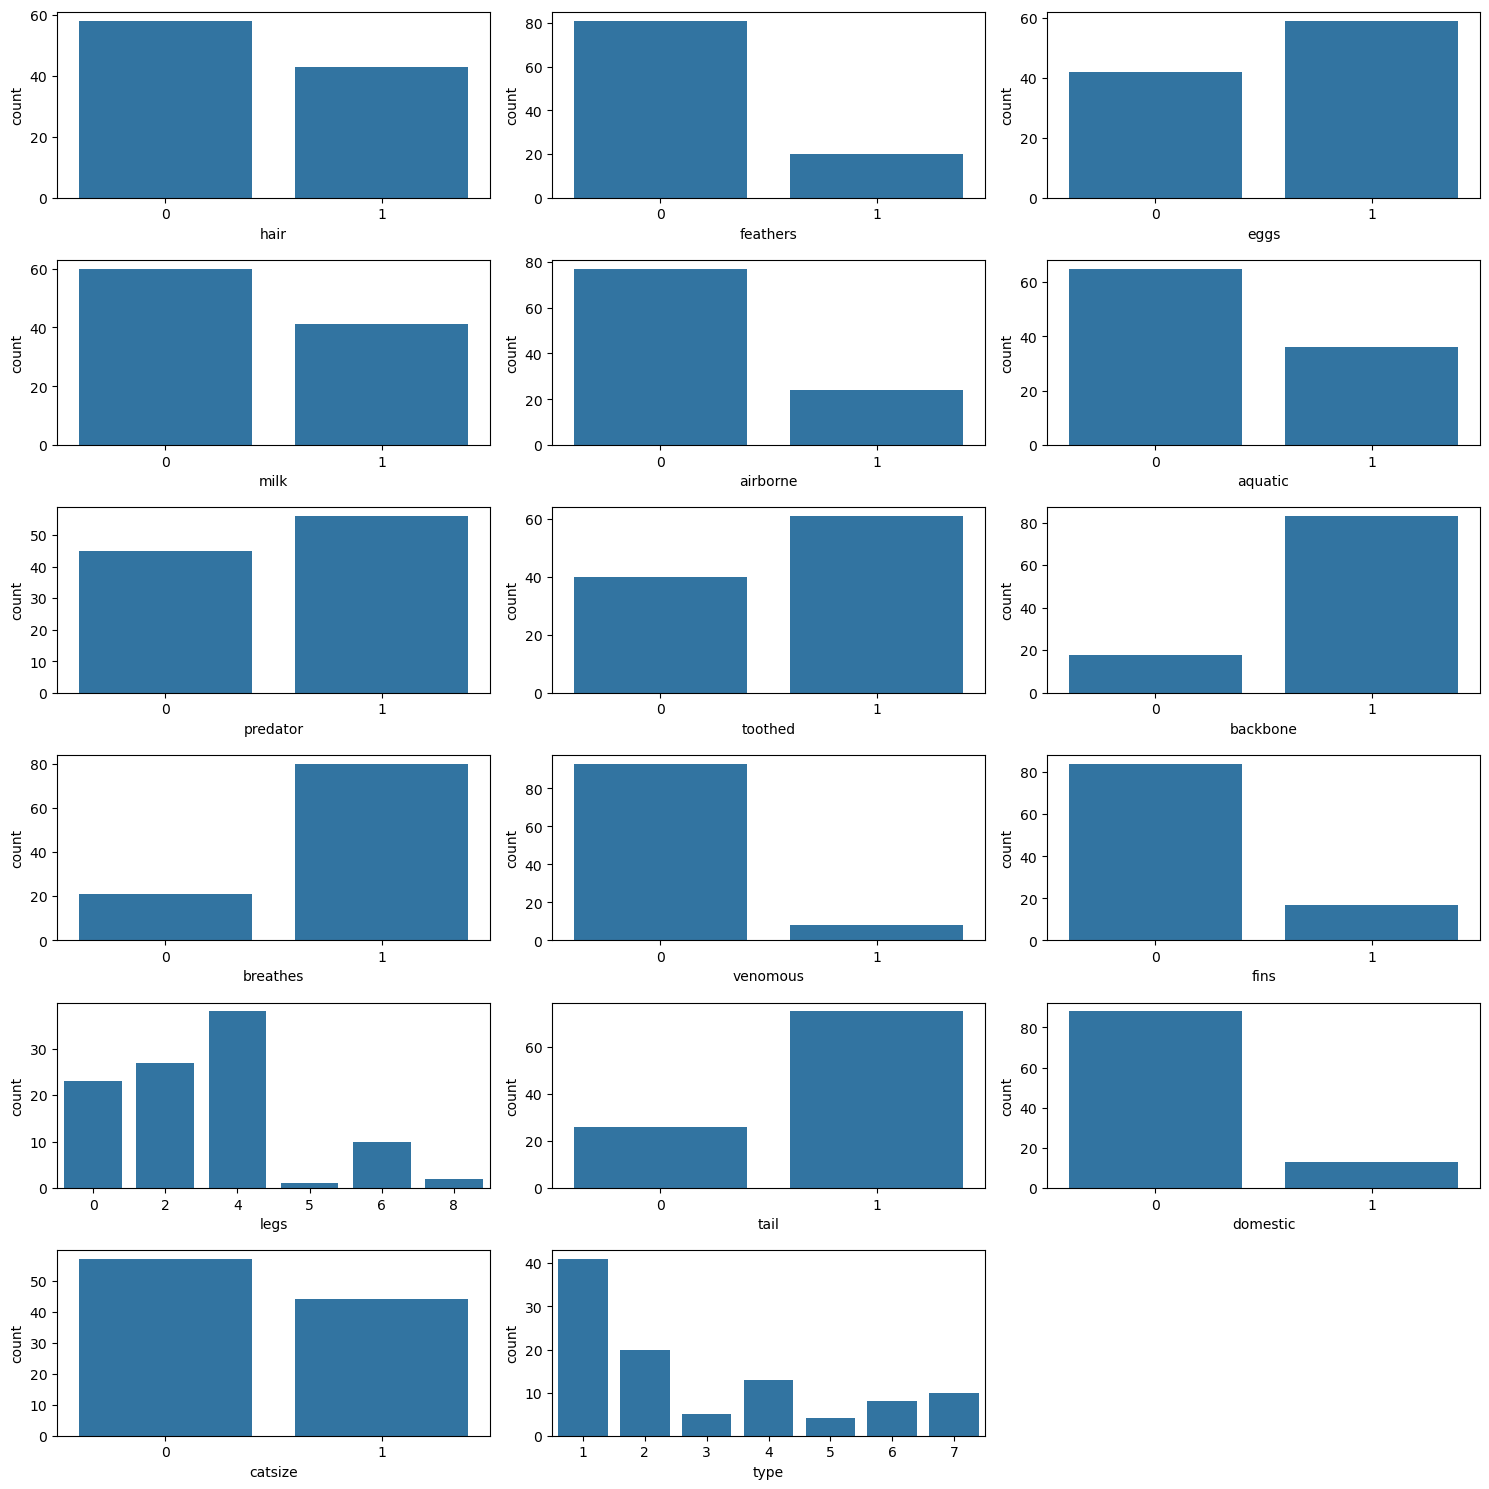

In [13]:
i=1
plt.figure(figsize=(15,15))
for col in number :
    plt.subplot(6,3,i)
    sns.countplot(data=number,x=col)
    i+=1
plt.tight_layout()
plt.show()

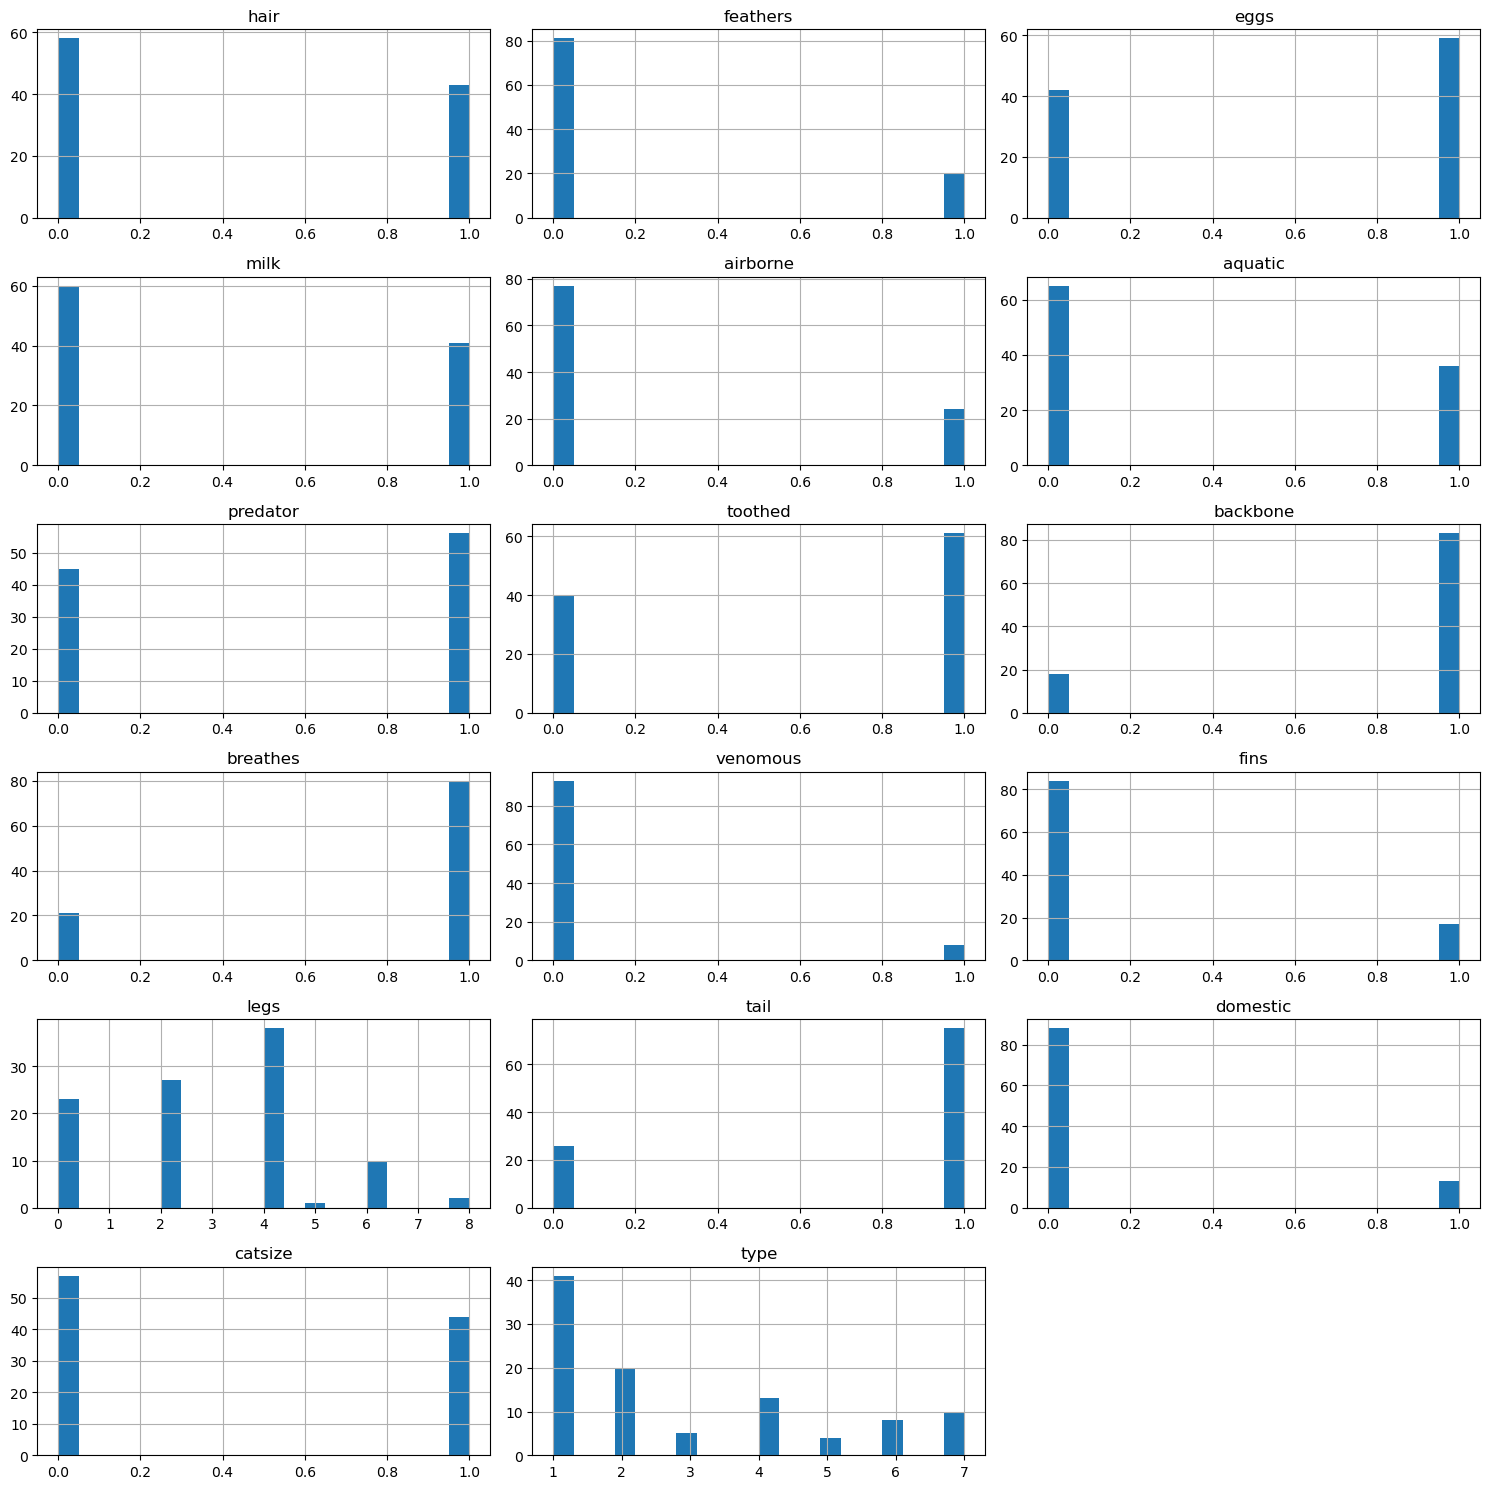

In [14]:
number.hist(bins=20,layout=(6,3),figsize=(15,15))
plt.tight_layout()
plt.show()

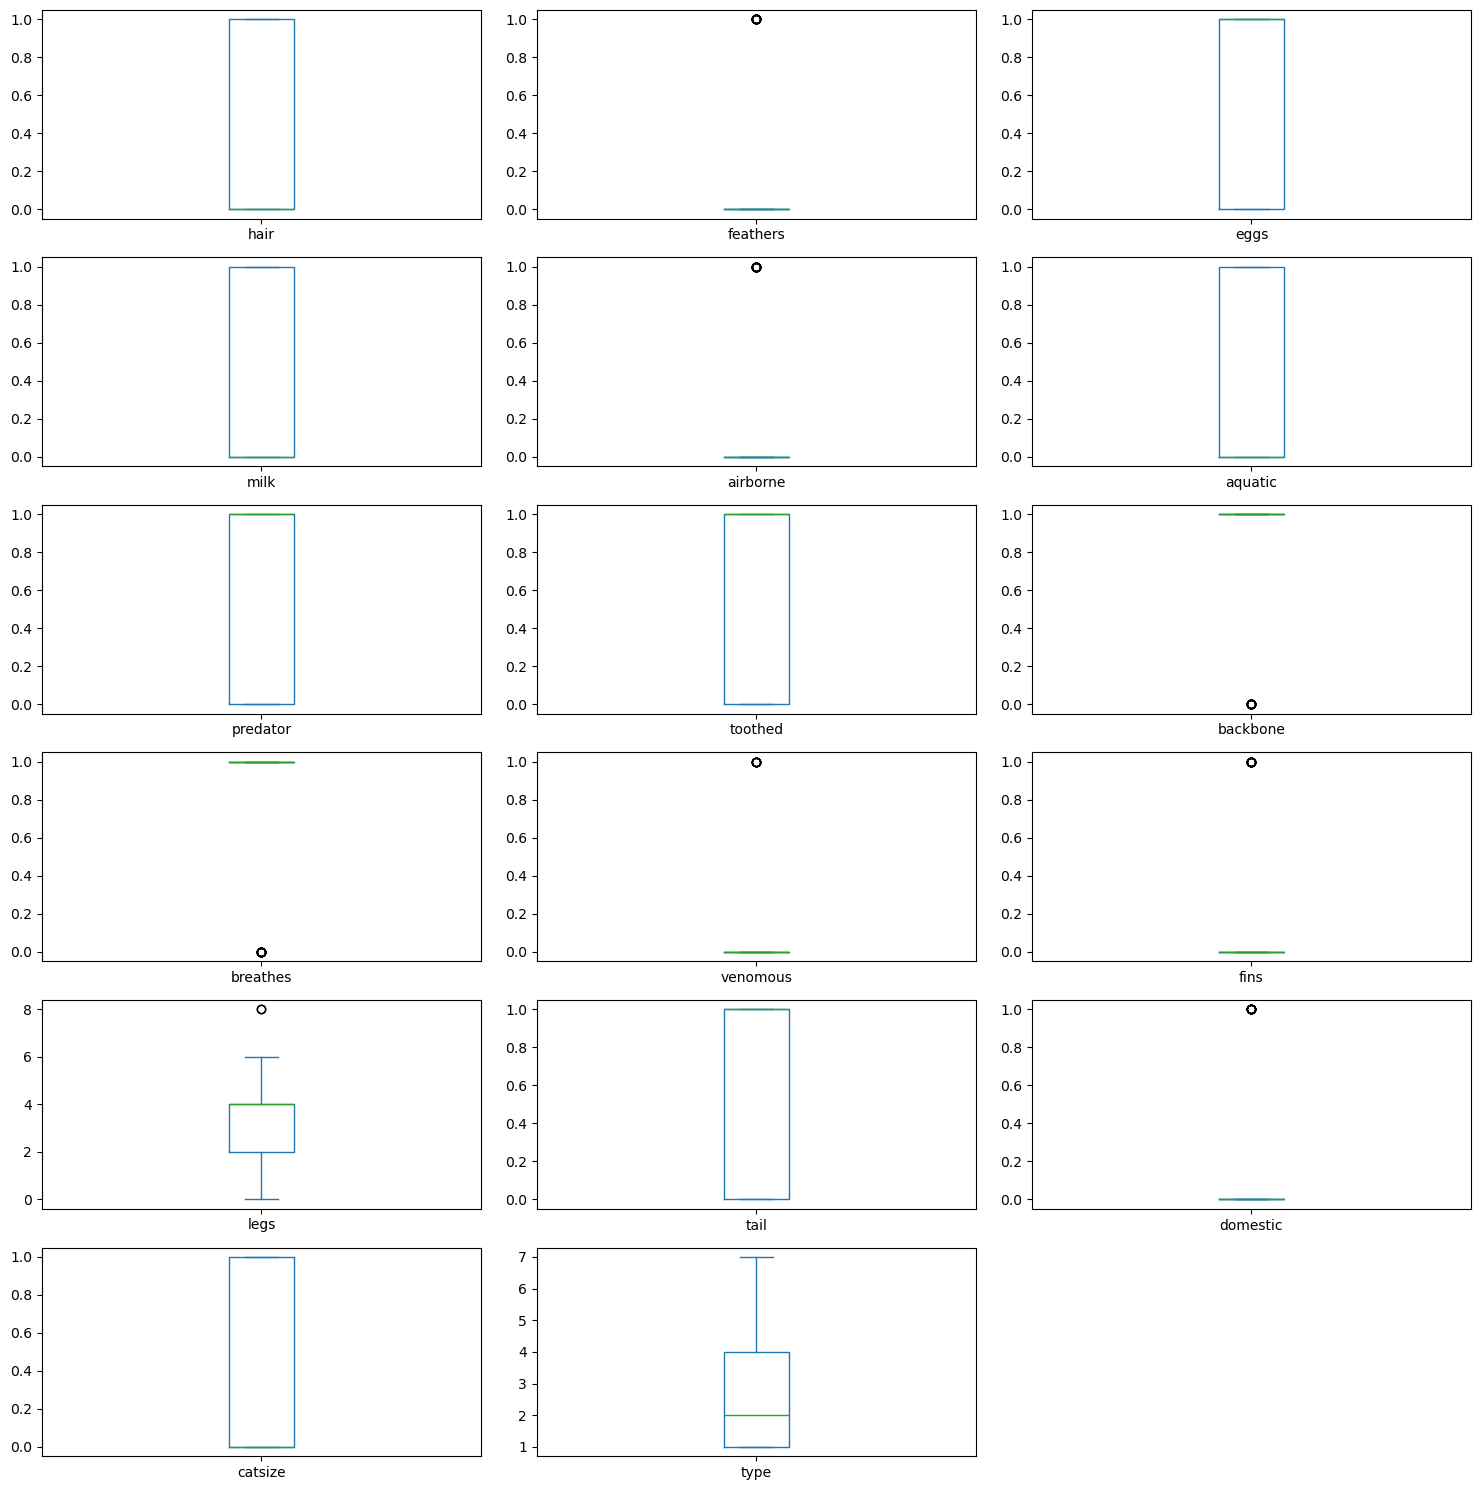

In [15]:
number.plot(kind="box",subplots=True,layout=(6,3),figsize=(15,15))
plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [17]:
data.drop("animal name",axis=1,inplace=True)

In [18]:
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [19]:
x=data.drop("type",axis=1)
y=data.type

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [103]:
kfold=KFold(n_splits=10,shuffle=True)
knn=KNeighborsClassifier(n_neighbors=2,metric="euclidean",weights="uniform")
cross=cross_val_score(knn,x,y,cv=kfold)
print(cross.mean())
knn.fit(x_train,y_train)

0.9109090909090909


KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [104]:
knn.score(x_test,y_test)

0.9523809523809523

In [73]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [105]:
y_pred=knn.predict(x_test)

In [106]:
accuracy_score(y_test,y_pred)

0.9523809523809523

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00         3
           3       1.00      0.50      0.67         2
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.99      0.92      0.94        21
weighted avg       0.96      0.95      0.95        21



In [70]:
from sklearn.model_selection import GridSearchCV

In [83]:
params={"n_neighbors":[1,2,3,4,5,6],
       "weights":["uniform","distance"],
        "metric":["euclidean","manhattan","'minkowski'"]}
knn=KNeighborsClassifier()
grid=GridSearchCV(knn,param_grid=params,cv=5)
grid.fit(x,y)

C:\Users\rosha\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\rosha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rosha\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rosha\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', "'minkowski'"],
                         'n_neighbors': [1, 2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [84]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}

In [85]:
grid.best_score_

0.97

In [109]:
knn=KNeighborsClassifier(n_neighbors=1,metric="euclidean",weights="uniform")
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

1.0

Interview Questions:
1. What are the key hyperparameters in KNN?
2. What distance metrics can be used in KNN?

1. Key Hyperparameters in KNN

n_neighbors (K): Number of nearby points used to make a prediction.

weights: Decides how much influence each neighbor has (uniform = equal, distance = closer ones matter more).

metric: Type of distance used (like Euclidean or Manhattan).

p: Power parameter for Minkowski distance (p=1 → Manhattan, p=2 → Euclidean).

2. Distance Metrics Used in KNN

Euclidean Distance: Straight-line distance, commonly used for continuous data.

Manhattan Distance: Sum of absolute differences, works better for grid-like or high-dimensional data.

Minkowski Distance: General form that includes both Euclidean and Manhattan.

Chebyshev Distance: Takes the maximum difference between coordinates.

Cosine Distance: Measures the angle between two vectors, used for text or sparse data.